In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cdasws import CdasWs

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
cdas = CdasWs()

In [4]:
selected_events = pd.read_pickle('selected_events.pkl')
selected_events[:5]

,start,end,duration,num_of_log,fill_rate
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000
3,2002-03-20 05:01:00,2002-03-20 05:11:00,11,8,0.727273
4,2002-03-20 05:29:00,2002-03-20 06:00:00,32,28,0.875000


In [5]:
i_event = 0
t_start, t_end = selected_events.iloc[i_event][:2]
t_start_localize = t_start.tz_localize(tz='UTC')
t_end_localize = t_end.tz_localize(tz='UTC')

In [6]:
%%time
variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)

CPU times: user 235 ms, sys: 22.1 ms, total: 258 ms
Wall time: 4.6 s


In [7]:
print(type(data_3DP))
print(data_3DP.keys())

<class 'spacepy.pycdf.CDFCopy'>
dict_keys(['Epoch', 'FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM$P$SC_CURRENT', 'MOM$P$MAGF', 'MOM$P$DENSITY', 'MOM$P$AVGTEMP', 'MOM$P$VTHERMAL', 'MOM$P$VELOCITY', 'MOM$P$FLUX', 'MOM$P$PTENS', 'MOM$P$MFTENS', 'MOM$P$T3', 'MOM$P$SYMM', 'MOM$P$SYMM_THETA', 'MOM$P$SYMM_PHI', 'MOM$P$SYMM_ANG', 'MOM$P$MAGT3', 'MOM$P$ERANGE', 'MOM$P$MASS', 'MOM$P$VALID', 'MOM$P$VEL_MAG', 'MOM$P$VEL_TH', 'MOM$P$VEL_PHI', 'MOM$A$SC_CURRENT', 'MOM$A$MAGF', 'MOM$A$DENSITY', 'MOM$A$AVGTEMP', 'MOM$A$VTHERMAL', 'MOM$A$VELOCITY', 'MOM$A$FLUX', 'MOM$A$PTENS', 'MOM$A$MFTENS', 'MOM$A$T3', 'MOM$A$SYMM', 'MOM$A$SYMM_THETA', 'MOM$A$SYMM_PHI', 'MOM$A$SYMM_ANG', 'MOM$A$MAGT3', 'MOM$A$ERANGE', 'MOM$A$MASS', 'MOM$A$VALID', 'MOM$A$VEL_MAG', 'MOM$A$VEL_TH', 'MOM$A$VEL_PHI', 'TIME', 'ENERGY_good', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9', 'metavar10', 'metavar11', 'metavar12', 'metavar13', 'metavar14', 'metavar15', 'metavar16'

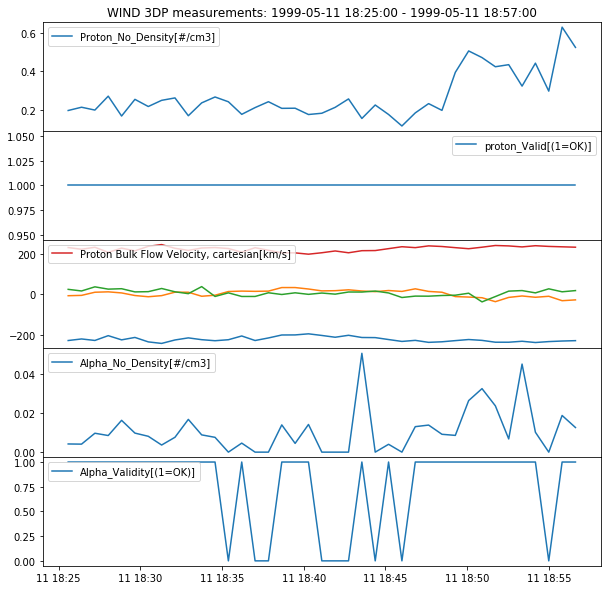

In [8]:
fig,axes = plt.subplots(5,figsize=(10,10))
plt.subplots_adjust(hspace=0)
ax = axes[0]

ax.set_title(f'WIND 3DP measurements: {t_start} - {t_end}')

ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$DENSITY'],label=f"{data_3DP['MOM$P$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$P$DENSITY'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VALID'],label=f"{data_3DP['MOM$P$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$P$VALID'].attrs['UNITS']}]")
ax = axes[2]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'])
ax.plot(data_3DP['Epoch'],np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1),label=f"{data_3DP['MOM$P$VELOCITY'].attrs['FIELDNAM']}[{data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$DENSITY'],label=f"{data_3DP['MOM$A$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$A$DENSITY'].attrs['UNITS']}]")
ax = axes[4]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$VALID'],label=f"{data_3DP['MOM$A$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$A$VALID'].attrs['UNITS']}]")

for ax in axes:
    ax.legend(loc='best')
    if ax!= axes[-1]:
        ax.set_xticks([])

_ = 0;